SVM con selección univariada de características (SVM-ANOVA)
===

Construcción del pipeline
---

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html#sphx-glr-auto-examples-svm-plot-svm-anova-py

In [1]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline(
    [
        # ---------------------------------------------------------------------
        # Realiza la selección de características que cumplen con el percentil
        # especificado
        #
        ("anova", SelectPercentile(chi2)),
        # ---------------------------------------------------------------------
        # z = (x - u) / s
        #
        ("scaler", StandardScaler()),
        # ---------------------------------------------------------------------
        # Máquina de vectores de soporte
        #
        ("svc", SVC(gamma="auto")),
    ],
)

Carga de datos de prueba
---

In [2]:
import numpy as np
from sklearn.datasets import load_iris

np.random.seed(0)

X, y = load_iris(return_X_y=True)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))
X.shape

(150, 40)

Evaluación del caso de prueba
---

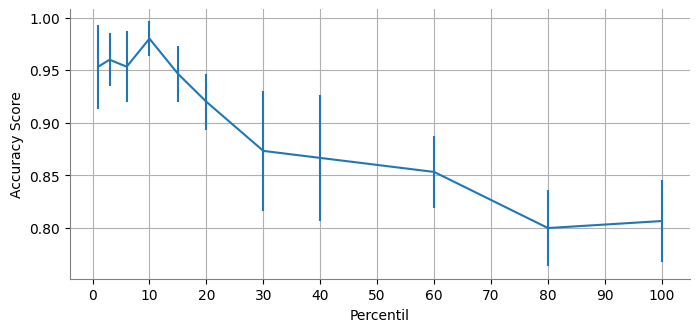

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    #
    # Cambia el percentil de selección
    #
    pipeline.set_params(anova__percentile=percentile)

    #
    # Computa el score de la porción usada para el conjunto de test
    # con CV
    #
    this_scores = cross_val_score(pipeline, X, y)

    #
    # Métricas para estimar la generalización de los scores
    #
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.figure(figsize=(8, 3.5))
plt.errorbar(percentiles, score_means, np.array(score_stds), c="tab:blue")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentil")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.show()